# Plot my running data

https://devblogs.microsoft.com/python/notebooks-are-getting-revamped/


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/activities.csv', parse_dates=['Activity Date'])

data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow
0,830991789,2017-01-13 22:15:46,Morning Run,Run,NaN,6801,18.00,230.0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,831118777,2016-12-25 11:37:49,Evening Swim,Swim,NaN,49,25,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,831118781,2016-12-25 11:40:30,Evening Swim,Swim,NaN,40,25,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,831118786,2016-12-25 11:44:13,Evening Swim,Swim,NaN,71,50,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,831118788,2017-01-12 10:40:36,Evening Run,Run,NaN,2298,6.51,78.0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Relative Effort',
       'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight',
       'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed',
       'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade',
       'Average Positive Grade', 'Average Negative Grade', 'Max Cadence',
       'Average Cadence', 'Max Heart Rate', 'Average Heart Rate', 'Max Watts',
       'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time',


# Clean up the Data
###  1. Pick up the relevant Columns

In [4]:
run_cols = ['Activity Date','Activity Name','Activity Type','Elapsed Time','Distance.1', 'Average Heart Rate', 'Average Cadence', 'Average Grade','Relative Effort']

# 1. Pick up only relevant columns
runs = data[run_cols].copy()

# 2. Filter for 'Runs' only
runs = runs[runs['Activity Type'].eq('Run')]

# 3. Drop NAs
runs = runs.dropna()

# 4. Add Average Speed column (wrong on source data)
runs['Average Speed'] = runs['Distance.1'] / runs['Elapsed Time']


In [5]:
runs.describe()

,Elapsed Time,Distance.1,Average Heart Rate,Average Cadence,Average Grade,Relative Effort,Average Speed
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3148.096866,8812.098585,146.635821,78.163840,-0.105889,91.729345,2.864692
std,1700.277697,4121.700345,10.424326,2.202730,0.113226,63.453499,0.294986
min,680.000000,2005.000000,86.000000,61.753353,-0.729167,3.000000,1.256409
25%,2270.000000,6102.949951,140.185684,77.233414,-0.168714,51.500000,2.727899
50%,2653.000000,8004.100098,148.000000,77.936943,-0.109975,79.000000,2.916877
75%,3572.000000,10000.750000,154.697708,79.052685,-0.019983,110.000000,3.050831
max,17385.000000,41882.898438,166.913498,84.841469,0.444767,463.000000,3.428406


In [6]:
runs

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance.1,Average Heart Rate,Average Cadence,Average Grade,Relative Effort,Average Speed
0,2017-01-13 22:15:46,Morning Run,Run,6801,18002.199219,151.787399,77.623749,-0.011665,230.0,2.646993
4,2017-01-12 10:40:36,Evening Run,Run,2298,6510.700195,151.921204,77.938179,-0.089084,78.0,2.833203
5,2017-01-05 10:43:15,Evening Run,Run,1746,5005.799805,142.586243,77.927795,-0.119861,39.0,2.867010
6,2017-01-10 06:43:00,Afternoon Run,Run,2500,8008.600098,147.157593,79.899597,-0.029968,69.0,3.203440
7,2016-12-31 09:17:10,Afternoon Run,Run,4331,12874.200195,155.719940,78.213539,-0.097870,170.0,2.972570
...,...,...,...,...,...,...,...,...,...,...
405,2020-08-20 10:15:45,Evening Run,Run,4273,12000.799805,149.352325,80.189987,-0.149990,129.0,2.808519
406,2020-08-24 10:20:29,Evening Run,Run,3346,10003.299805,149.158737,80.902985,0.025991,101.0,2.989629
407,2020-08-26 10:06:06,Evening Run,Run,2082,6001.500000,135.687683,80.589989,-0.069983,32.0,2.882565
408,2020-08-31 08:37:12,Afternoon Run,Run,2310,7004.600098,150.865570,81.102776,-0.128487,75.0,3.032294


In [7]:
row_count = (len(runs))
print('Analyzing {} rows of data'.format(row_count))

Analyzing 351 rows of data


<AxesSubplot:xlabel='Relative Effort'>

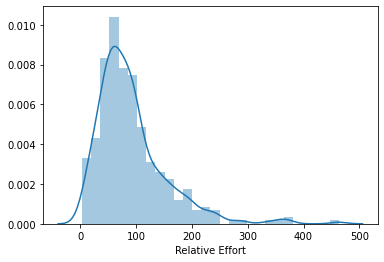

In [8]:
import seaborn as sns
sns.distplot(runs['Relative Effort'])

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

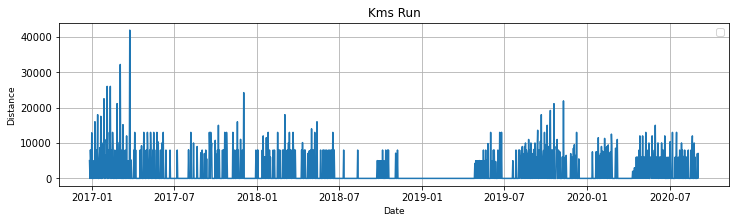

In [9]:

# runs = runs[runs['Activity Date']>'2020-01-01']

first_date = min(runs['Activity Date']).replace(hour=0, minute=0, second=0, microsecond=0)
last_date = max(runs['Activity Date']).replace(hour=0, minute=0, second=0, microsecond=0)

runs['Activity Date'] = pd.to_datetime(runs['Activity Date'].dt.date)


calendar = pd.DataFrame()
calendar['days'] = pd.date_range(first_date, last_date, freq='D')

full_df = pd.merge(calendar,runs,left_on='days', right_on='Activity Date', how='left')

full_df['Distance.1'] = full_df['Distance.1'].fillna(0)


full_df.set_index('days', inplace=True)


fig = plt.figure()
f, axs = plt.subplots(1,1,figsize=(12,3))
axs.plot(full_df.index.values,full_df['Distance.1'])

plt.title('Kms Run')
plt.xlabel('Date', fontsize=9)
plt.ylabel('Distance', fontsize=9)    
axs.legend(loc='best')
# axs.axhline(linewidth=1, color='black')
plt.grid()

# plt.rcdefaults()
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

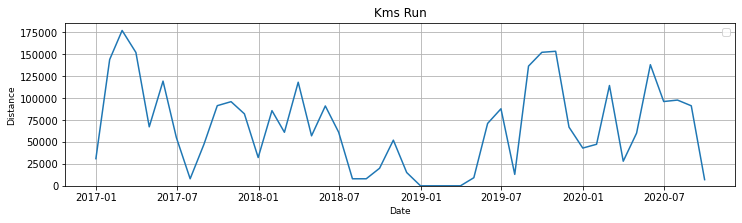

In [10]:
# Group data by Months
df = full_df.groupby(pd.Grouper(freq="M")).sum()

#only show last 2 Years
# df = df[df.index > '2019-01-01']

fig = plt.figure()
f, axs = plt.subplots(1,1,figsize=(12,3))
axs.plot(df.index.values,df['Distance.1'])

plt.title('Kms Run')
plt.xlabel('Date', fontsize=9)
plt.ylabel('Distance', fontsize=9)
plt.ylim(ymin=0)
axs.legend(loc='best')
# axs.axhline(linewidth=1, color='black')
plt.grid()

# plt.rcdefaults()
plt.show()

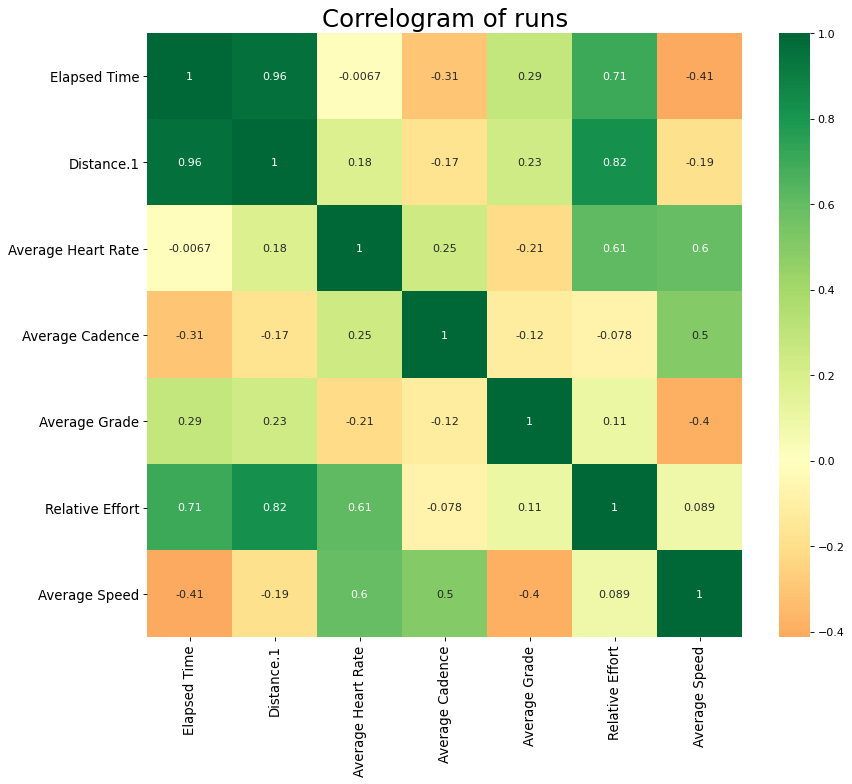

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(runs.corr(), xticklabels=runs.corr().columns, yticklabels=runs.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of runs', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

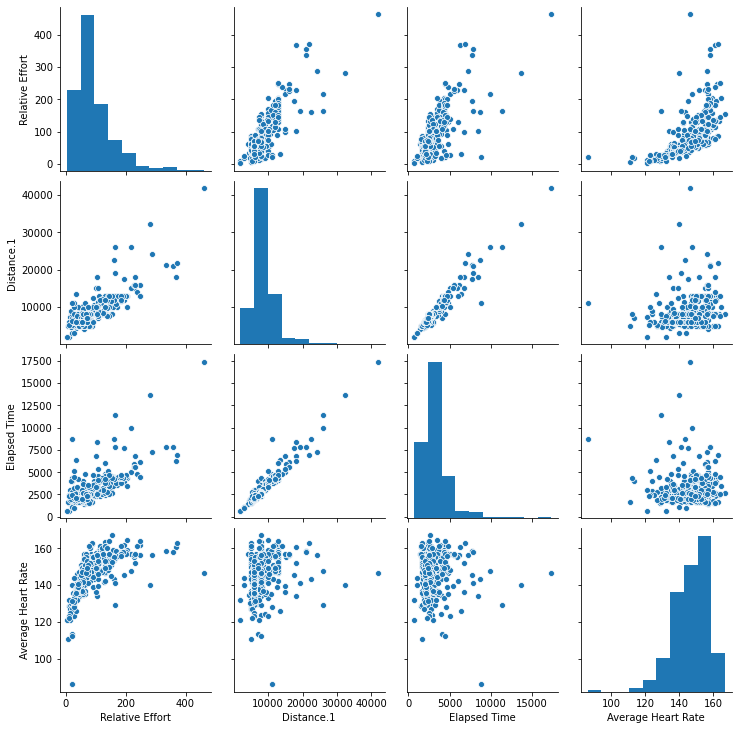

In [12]:
corr_cols = ['Relative Effort','Distance.1','Elapsed Time','Average Heart Rate']

runs_small = runs[corr_cols]

sns.pairplot(runs_small)